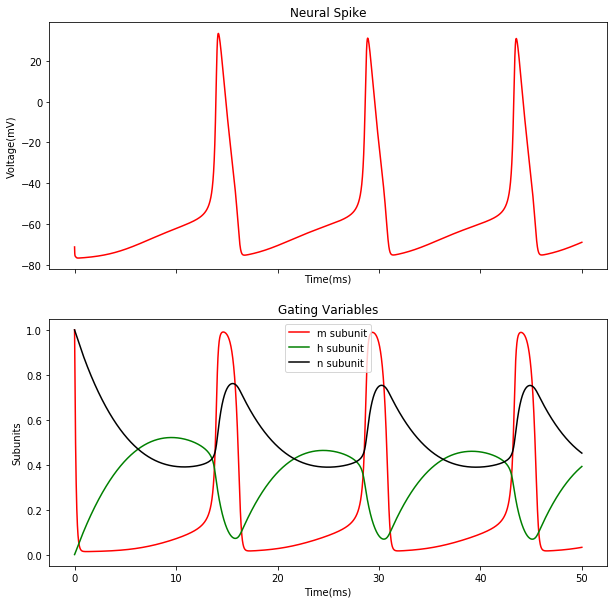

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Defining model parameters
Cm = 1.0   #uF/cm^2
gK = 36.0  #mS/cm^2
gNa = 120.0 #mS/cm^2
gl = 0.3  #mS/cm^2
VK = -77.0  #mV
VNa = 50.0  #mV
Vl = -54.387  #mV

#Defining a function that will store the parameters associated with Sodium channel
def Sodium_values(V):
    alpha_m = (0.1*(V + 40.0))/(1.0 - np.exp(-(V + 40.0)/10.0))
    beta_m = 4.0*np.exp(-(V + 65.0)/18.0)
    alpha_h = 0.07 * np.exp(-(V + 65.0)/20.0)
    beta_h = 1.0/(1.0 + np.exp(-(V + 35.0)/10.0))
    m_initial = alpha_m/(alpha_m + beta_m)
    h_initial = alpha_h/(alpha_h + beta_h)
    return [alpha_m,beta_m,alpha_h,beta_h,m_initial,h_initial]

#Defining the function that will store the parameters associated with Potassium channel
def Potassium_values(V):
    alpha_n = (0.01*(V + 55.0))/(1 - np.exp(-(V + 55.0)/10.0))
    beta_n = 0.125 * np.exp(-(V + 65.0)/80.0)
    n_initial = alpha_n/(alpha_n + beta_n)
    return [alpha_n,beta_n,n_initial]

#Giving an external current
def I_ext(t):
    return 10.0

#Defining the model
def model(y,t):
    V = y[0:1]
    m = y[1:2]
    h = y[2:3]
    n = y[3:4]
    
    [alpha_m,beta_m,alpha_h,beta_h,m_initial,n_intial] = Sodium_values(V)
    [alpha_n,beta_n,n_initial] = Potassium_values(V)
    
    dVdt = (I_ext(t)/Cm) - ((gK*np.power(n,4)*(V-VK))/(Cm)) - ((gNa*np.power(m,3)*h*(V-VNa))/(Cm)) - ((gl*(V-Vl))/Cm)  #dV/dt
    dmdt = (alpha_m*(1-m)) - (beta_m*m)  #dm/dt
    dhdt = (alpha_h*(1-h)) - (beta_h*h)  #dh/dt
    dndt = (alpha_n*(1-n)) - (beta_n*n)  #dn/dt
    eqs = np.concatenate((dVdt,dmdt,dhdt,dndt),0)
    return eqs

epsilon = 0.01  #time step
t = np.arange(0.0,50.0,0.01)
y = np.zeros((len(t),4))

#Initialising the parameters
y[0] = [-71,1.0,0.0,1.0]

#Solving the model
for i in range(1,t.shape[0]):
    
    y[i] = epsilon*model(y[i-1],t[i-1]) + y[i-1]  #Euler Integration step


#Plotting the output
fig, ax = plt.subplots(2,figsize=(10,10), sharex=True)

ax[0].plot(t,y[:,0],'r')
ax[0].set_title("Neural Spike")
ax[0].set_xlabel("Time(ms)")
ax[0].set_ylabel("Voltage(mV)")

ax[1].plot(t,y[:,1],'r',label="m subunit")
ax[1].plot(t,y[:,2],'g',label="h subunit")
ax[1].plot(t,y[:,3],'k',label="n subunit")
ax[1].set_title("Gating Variables")
ax[1].set_xlabel("Time(ms)")
ax[1].set_ylabel("Subunits")
ax[1].legend()
plt.show()